In [ ]:
#import dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the Dataset
dir=f'/content/drive/MyDrive/EEG/data'
import pandas as pd
url = 'https://drive.google.com/file/d/1GelT0xYuEj3kHEA45MOZP5-WVXsDgVeF/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path,sep=',')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
pd.isnull(df).sum() 

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [ ]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [ ]:
pd.isnull(df).sum() 

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          2
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df.groupby(['Age'])['MMSE'].median()

Age
60    30.0
61    30.0
62    30.0
63    30.0
64    29.0
65    29.5
66    29.5
67    28.5
68    29.0
69    29.0
70    29.0
71    28.0
72    27.0
73    29.0
74    30.0
75    28.0
76    28.0
77    29.0
78    29.0
79    29.0
80    28.5
81    28.5
82    29.0
83    29.0
84    28.0
85    30.0
86    29.5
87    28.5
88    29.5
89    29.0
90    27.0
91    28.0
92    28.0
93    30.0
94    29.0
95    29.0
96    26.0
97    30.0
98    21.0
Name: MMSE, dtype: float64

In [ ]:
df["MMSE"].fillna(df.groupby("Age")["MMSE"].transform("median"), inplace=True)

In [ ]:
pd.isnull(df).sum() 

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,3.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,3.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,3.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
df = df.drop(['MRI ID', 'Hand','Subject ID'], axis='columns') # Drop unnecessary columns

In [ ]:
#Considering only the First Visit Data
#Converted is also Demented
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,0,1,75,12,3.0,23.0,0.5,1678,0.736,1.046
2,0,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,1,1,0,1,71,16,2.0,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,1,0,1,73,12,3.0,23.0,0.5,1661,0.698,1.056
146,0,1,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
147,1,1,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
148,1,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [ ]:
# bar drawing function
import matplotlib.pyplot as plt
Demented = df[df['Group']==1].value_counts()
Nondemented = df[df['Group']==0].value_counts()
print(len(Demented))
print(len(Nondemented))

78
72


In [ ]:
df

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,0,1,75,12,3.0,23.0,0.5,1678,0.736,1.046
2,0,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,1,1,0,1,71,16,2.0,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,1,0,1,73,12,3.0,23.0,0.5,1661,0.698,1.056
146,0,1,0,0,66,13,2.0,30.0,0.0,1495,0.746,1.174
147,1,1,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
148,1,1,0,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [ ]:
#Avoid Class Imbalance problem
SAMPLE_SIZE = 72

# take a sample of the majority class 0 (total = 198738)
Demented = df[df['Group']==1].sample(SAMPLE_SIZE)
# take a sample of class 1 (total = 78786)
NonDemented = df[df['Group']==0].sample(SAMPLE_SIZE)

# concat the two dataframes
df = pd.concat([Demented, NonDemented], axis=0).reset_index(drop=True)

# Check the new class distribution
df['Group'].value_counts()

1    72
0    72
Name: Group, dtype: int64

Text(0.5, 1.0, 'Gender and Demented rate')

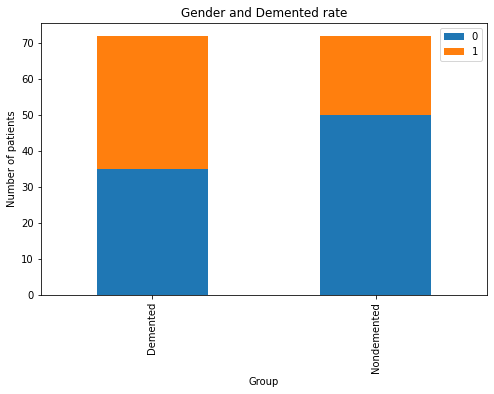

In [ ]:
# bar drawing function
import matplotlib.pyplot as plt
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
# Gender  and  Group ( Femal=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

In [ ]:
df

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,1,0,0,74,12,3.0,26.0,0.5,1171,0.733,1.499
1,1,1,0,1,70,16,1.0,25.0,0.5,1568,0.696,1.119
2,1,1,0,0,78,12,3.0,29.0,0.0,1475,0.731,1.190
3,1,1,0,0,73,14,3.0,29.0,0.5,1238,0.757,1.418
4,1,1,0,0,73,13,2.0,23.0,0.5,1536,0.725,1.142
...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,1,0,0,61,16,1.0,30.0,0.0,1513,0.771,1.160
140,0,1,0,1,68,14,3.0,26.0,0.0,1444,0.778,1.216
141,0,1,0,0,69,16,3.0,30.0,0.0,1491,0.794,1.177
142,0,1,0,0,69,12,3.0,29.0,0.0,1365,0.783,1.286


In [ ]:
df.drop(['Visit'], axis = 1)

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,0,74,12,3.0,26.0,0.5,1171,0.733,1.499
1,1,0,1,70,16,1.0,25.0,0.5,1568,0.696,1.119
2,1,0,0,78,12,3.0,29.0,0.0,1475,0.731,1.190
3,1,0,0,73,14,3.0,29.0,0.5,1238,0.757,1.418
4,1,0,0,73,13,2.0,23.0,0.5,1536,0.725,1.142
...,...,...,...,...,...,...,...,...,...,...,...
139,0,0,0,61,16,1.0,30.0,0.0,1513,0.771,1.160
140,0,0,1,68,14,3.0,26.0,0.0,1444,0.778,1.216
141,0,0,0,69,16,3.0,30.0,0.0,1491,0.794,1.177
142,0,0,0,69,12,3.0,29.0,0.0,1365,0.783,1.286


In [ ]:
y = df['Group'] # Target variable
cols = ['MR Delay', 'M/F','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF']
X = df[cols]
X

,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,74,12,3.0,26.0,0.5,1171,0.733,1.499
1,0,1,70,16,1.0,25.0,0.5,1568,0.696,1.119
2,0,0,78,12,3.0,29.0,0.0,1475,0.731,1.190
3,0,0,73,14,3.0,29.0,0.5,1238,0.757,1.418
4,0,0,73,13,2.0,23.0,0.5,1536,0.725,1.142
...,...,...,...,...,...,...,...,...,...,...
139,0,0,61,16,1.0,30.0,0.0,1513,0.771,1.160
140,0,1,68,14,3.0,26.0,0.0,1444,0.778,1.216
141,0,0,69,16,3.0,30.0,0.0,1491,0.794,1.177
142,0,0,69,12,3.0,29.0,0.0,1365,0.783,1.286


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
num_classes = 2

In [ ]:
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

In [ ]:
X = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X.shape

(144, 10, 1)

In [ ]:
model = Sequential()
model.add(Convolution1D(128, kernel_size=3,padding = 'same' ,activation='sigmoid', input_shape=(X.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Convolution1D(128,kernel_size=3,padding = 'same', activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 10, 128)           512       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 128)           512       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 128)            49280     
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 128)            512       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [ ]:
model.compile(optimizer='rmsprop',loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
#print(X_train.shape)
#print(y_train.shape)

In [ ]:
from sklearn.model_selection import train_test_split
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS, BATCH_SIZE):
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE,validation_data=(val_x, val_y))  
    _, val_acc=model.evaluate(val_x, val_y)
    print("Val Score: ", val_acc)
    return results, val_acc

n_folds=10
epochs=10
batch_size=5
cv_scores=[]
#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(X, y, test_size=0.1)
    print(t_x.shape,val_x.shape)
    print(t_y.shape,val_y.shape)
    models, test_acc = fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size)
    model_history.append(models)
    cv_scores.append(test_acc)
    print(np.mean(cv_scores), np.std(cv_scores))

Training on Fold:  1
(129, 10, 1) (15, 10, 1)
(129,) (15,)
Epoch 1/10
26/26 [==============================] - 0s 5ms/step - loss: 0.2553 - accuracy: 0.9070 - val_loss: 0.3316 - val_accuracy: 0.8667
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2621 - accuracy: 0.9070 - val_loss: 0.2734 - val_accuracy: 0.8667
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.9070 - val_loss: 0.3270 - val_accuracy: 0.8667
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2842 - accuracy: 0.9070 - val_loss: 0.3351 - val_accuracy: 0.8667
Epoch 5/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2841 - accuracy: 0.9070 - val_loss: 0.3101 - val_accuracy: 0.8667
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2674 - accuracy: 0.9225 - val_loss: 0.3404 - val_accuracy: 0.8667
Epoch 7/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.9225 - v

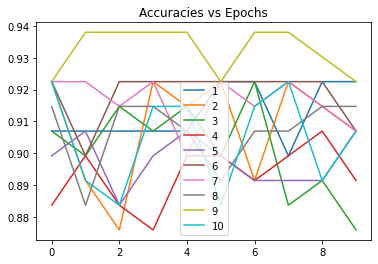

In [ ]:
plt.title('Accuracies vs Epochs')
for i in range(0,10):
   plt.plot(model_history[i].history['accuracy'], label=i+1)
plt.legend()
plt.show()

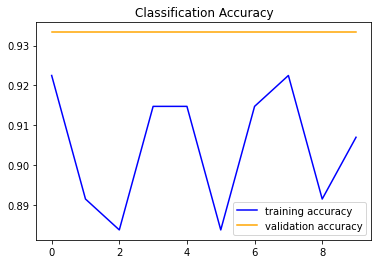

In [ ]:
import matplotlib.pyplot as plt
plt.title('Classification Accuracy')
plt.plot(model_history[9].history['accuracy'], color='blue', label='train')
plt.plot(model_history[9].history['val_accuracy'], color='orange', label='test')
plt.legend(['training accuracy','validation accuracy'])

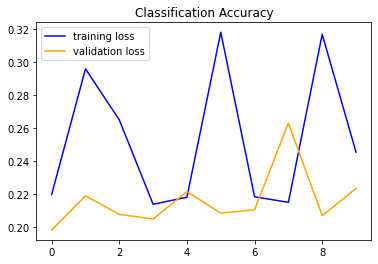

In [ ]:
import matplotlib.pyplot as plt
plt.title('Classification Accuracy')
plt.plot(model_history[9].history['loss'], color='blue', label='train')
plt.plot(model_history[9].history['val_loss'], color='orange', label='test')
plt.legend(['training loss','validation loss'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

yhat_probs = model.predict(val_x, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(val_x, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:]
yhat_classes = yhat_classes[:]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_y, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_y, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_y, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(val_y, yhat_classes)
print('F1 score: %f' % f1)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_y, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_y, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_y, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(val_y, yhat_classes)
print('F1 score: %f' % f1)
# confusion matrix
matrix = confusion_matrix(val_y, yhat_classes)
print(matrix)

Accuracy: 0.933333
Precision: 1.000000
Recall: 0.833333
F1 score: 0.909091
Accuracy: 0.933333
Precision: 1.000000
Recall: 0.833333
F1 score: 0.909091
[[9 0]
 [1 5]]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
